In [36]:
pip install decision-tree-id3

In [37]:
from id3 import Id3Estimator, export_graphviz,export_text

In [38]:
from graphviz import Source

In [39]:
import matplotlib.pyplot as plt

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [42]:
#Import the CIFAR-10 image dataset
from keras.datasets import cifar10
#Load the dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

In [43]:
print(xTrain.shape)

(50000, 32, 32, 3)


In [44]:
print(yTrain.shape)

(50000, 1)


In [45]:
print(xTest.shape)

(10000, 32, 32, 3)


In [46]:
print(yTest.shape)

(10000, 1)


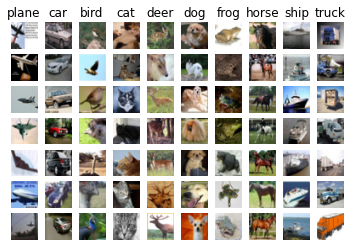

In [47]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Visualize the dataset.
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(yTrain == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(xTrain[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [48]:
xVal = xTrain[1000:, :].astype(np.float)
yVal = np.squeeze(yTrain[1000:, :])
xTrain = xTrain[:1000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:1000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

Train image shape:    (1000, 32, 32, 3)
Train label shape:    (1000,)
Validate image shape: (49000, 32, 32, 3)
Validate label shape: (49000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


In [49]:
meanImage = np.mean(xTrain, axis=0)
print(meanImage.shape)
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage

(32, 32, 3)


In [50]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])


(1000, 32, 32, 3)
(1000,)
(1000, 3072)
[-74.467 -76.524 -71.487 ...  -5.443 -35.53  -43.33 ]


In [51]:
clf = Id3Estimator()
clf.fit(xTrain, yTrain)


Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0, min_samples_split=2, prune=False)

In [52]:
y_pred=clf.predict(xTest)

In [53]:
# model accuracy
print("Accuracy:",accuracy_score(yTest, y_pred))

Accuracy: 0.2024


In [54]:
# accuracy report
print("Accuracy:",classification_report(yTest, y_pred))

Accuracy:               precision    recall  f1-score   support

           0       0.28      0.33      0.30      1000
           1       0.20      0.20      0.20      1000
           2       0.15      0.14      0.14      1000
           3       0.12      0.11      0.11      1000
           4       0.16      0.20      0.18      1000
           5       0.21      0.16      0.18      1000
           6       0.22      0.23      0.22      1000
           7       0.16      0.16      0.16      1000
           8       0.27      0.29      0.28      1000
           9       0.25      0.21      0.23      1000

    accuracy                           0.20     10000
   macro avg       0.20      0.20      0.20     10000
weighted avg       0.20      0.20      0.20     10000



In [55]:
#y_pred=clf.predict(xTest)
print("Accuracy:",accuracy_score(yTrain,clf.predict(xTrain)))

Accuracy: 1.0
